In [1]:
import pickle
import numpy as np
import pandas as pd

Make data ready Like paper dataset

In [2]:
excel = pd.read_excel (r'mmr_covid_dataset.xlsx')
data = []

for story,question,answer in excel.values.tolist():
    data.append((story.split(), question.split(), answer))

print(data[0])

(['I', 'have', 'fever', 'and', 'aches', '.'], ['Can', 'the', 'fever', 'and', 'body', 'aches', 'I', 'have', 'cause', 'corona', '?'], 'yes')


Make test and train data

In [3]:
train_data = data[:int(len(data)*0.7)]
test_data = data[-int(len(data)*0.3):]
input_train = []
questions_train = []
answers_train = []
input_test = []
questions_test = []
answers_test = []

In [4]:
print(len(train_data))

69


In [5]:
len(test_data)

29

In [6]:
train_data[0]

(['I', 'have', 'fever', 'and', 'aches', '.'],
 ['Can',
  'the',
  'fever',
  'and',
  'body',
  'aches',
  'I',
  'have',
  'cause',
  'corona',
  '?'],
 'yes')

Make vocabulary (train+test)

In [7]:
all_data = train_data + test_data; len(all_data);

In [8]:
vocab = set();

for story,question,answer in all_data:
    vocab = vocab.union(set(story));
    vocab = vocab.union(set(question));
    
vocab.add("no");
vocab.add("yes");

vocab_len = len(vocab) + 1

vocab

{'.',
 '?',
 'Can',
 'Corona',
 'Could',
 'Do',
 'Does',
 'I',
 'a',
 'ache',
 'aches',
 'all',
 'alot',
 'always',
 'am',
 'and',
 'any',
 'anyone',
 'anything',
 'are',
 'because',
 'bed',
 'bed.',
 'body',
 'breath',
 'breathe',
 'breathe,',
 'breathing',
 'but',
 "can't",
 'cannot',
 'caugh',
 'cause',
 'chills',
 'chills.',
 'cold',
 'corona',
 'coronavirus',
 'cough',
 'coughing',
 'difficulty',
 'dizzy',
 'dizzy.',
 'do',
 "don't",
 'dry',
 'except',
 'experiencing',
 'feel',
 'feeling',
 'fever',
 'feverish',
 'finding',
 'fine,',
 'food',
 'from',
 'get',
 'getting',
 'hard',
 'has',
 'have',
 'having',
 'high',
 'hurts',
 'iam',
 'if',
 'in',
 'infected',
 'is',
 'it',
 'linked',
 'lost',
 'lot',
 'me',
 'mean',
 'my',
 'no',
 'not',
 'of',
 'one',
 'out',
 'over',
 'phlegm.',
 'problem',
 'sense',
 'shortness',
 'sick',
 'sick,',
 'signs',
 'slight',
 'smell',
 'sneesing',
 'sneez',
 'sneezing',
 'sneezing,',
 'some',
 'stop',
 'suffering',
 'sweating',
 'symptom',
 'symptom

Longest story & question

In [9]:
all_story_len = [len(data[0]) for data in all_data]
max_story_len = max(all_story_len)
all_question_len = [len(data[1]) for data in all_data]
max_question_len = max(all_question_len)

In [10]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [11]:
# map every word to index (lower cased)
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
vocab_sze = len(tokenizer.word_index) + 1

In [12]:
train_story_text = []
train_question_text = []
train_answers = []

In [13]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)
train_question_text;
print(len(train_answers))
print(train_story_text)
print(len(train_question_text))

69
[['I', 'have', 'fever', 'and', 'aches', '.'], ['I', 'have', 'aches', '.'], ['I', 'have', 'fever', '.'], ['iam', 'coughing', '.'], ['iam', 'sneezing'], ['iam', 'coughing', 'and', 'sneezing', '.', 'I', 'have', 'fever', 'and', 'aches', '.'], ['iam', 'coughing', '.', 'I', 'have', 'fever', '.'], ['iam', 'coughing', '.', 'I', 'have', 'aches', '.'], ['iam', 'sneezing', '.', 'I', 'have', 'aches', '.'], ['iam', 'sneezing', '.', 'I', 'have', 'fever', '.'], ['I', 'have', 'coughing', 'and', 'sneezing', '.'], ['I', 'have', 'difficulty', 'to', 'breathe', '.', 'I', 'have', 'fever', 'and', 'aches', '.', 'I', 'have', 'coughing', 'and', 'sneezing', '.'], ['I', 'have', 'difficulty', 'to', 'breathe', '.', 'I', 'have', 'fever', 'and', 'aches', '.'], ['I', 'have', 'difficulty', 'to', 'breathe', '.', 'I', 'have', 'coughing', 'and', 'sneezing', '.'], ['I', 'have', 'difficulty', 'to', 'breathe', '.'], ['I', 'have', 'dry', 'cough', '.', 'I', 'have', 'difficulty', 'to', 'breathe', '.'], ['I', 'have', 'dry', '

In [14]:
train_story_sequence = tokenizer.texts_to_sequences(train_story_text)
len(train_story_sequence)

69

In [15]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
   #stories = X
   #questions = Xq
   #answer = Y
    X = []
    Xq = []
    Y = []
    
    for story,question,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        y = np.zeros(vocab_sze)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq,maxlen=max_question_len),np.array(Y))


In [16]:
input_train, questions_train, answers_train = vectorize_stories(train_data)
input_test, questions_test, answers_test = vectorize_stories(test_data)
print(answers_train.shape)
print(input_train.shape)
print(questions_train.shape)

(69, 121)
(69, 23)
(69, 23)


In [17]:
tokenizer.word_index["no"];
tokenizer.word_index["yes"]

34

NETWORK

In [18]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute, Dropout, add, dot, concatenate, LSTM

In [19]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))
print(question)
print(input_sequence)

KerasTensor(type_spec=TensorSpec(shape=(None, 23), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 23), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [20]:
vocab_size = vocab_sze

Input Encoder M

In [21]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.25)) #randomly turn neurons during training

# output => (samples,story_maxlen,embedding_dim)

In [22]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.25))

# output => (samples,story_maxlen,max_question_len)

In [23]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.25)) 

# output => (samples,question_maxlen,max_question_len)

In [24]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [25]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)
print(match)

KerasTensor(type_spec=TensorSpec(shape=(None, 23, 23), dtype=tf.float32, name=None), name='activation/Softmax:0', description="created by layer 'activation'")


In [26]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [27]:
answer = concatenate([response, question_encoded])
answer

<KerasTensor: shape=(None, 23, 87) dtype=float32 (created by layer 'concatenate')>

In [28]:
answer = LSTM(32)(answer)

In [29]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)
print(answer)
print(vocab_size)

KerasTensor(type_spec=TensorSpec(shape=(None, 121), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
121


In [30]:
answer = Activation('softmax')(answer)

In [31]:
model = Model([input_sequence,question],answer)

In [32]:
model.compile(optimizer='rmsprop',loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 23)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 23)]         0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     7744        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 23, 64)       7744        input_2[0][0]                    
______________________________________________________________________________________________

In [34]:
#history = model.fit([input_train, questions_train], answers_train,batch_size=12,epochs=120,validation_data=([input_test, questions_test], answers_test))
history = model.fit([input_train, questions_train], answers_train,batch_size=12,epochs=120,validation_data=([input_test, questions_test], answers_test));


Epoch 1/120
6/6 [==============================] - 5s 203ms/step - loss: 4.6850 - accuracy: 0.3333 - val_loss: 4.4530 - val_accuracy: 0.1034
Epoch 2/120
6/6 [==============================] - 0s 26ms/step - loss: 3.9610 - accuracy: 0.5652 - val_loss: 3.2067 - val_accuracy: 0.1034
Epoch 3/120
6/6 [==============================] - 0s 25ms/step - loss: 2.9622 - accuracy: 0.4493 - val_loss: 2.5104 - val_accuracy: 0.1034
Epoch 4/120
6/6 [==============================] - 0s 23ms/step - loss: 2.4279 - accuracy: 0.4493 - val_loss: 2.0705 - val_accuracy: 0.1034
Epoch 5/120
6/6 [==============================] - 0s 27ms/step - loss: 2.0950 - accuracy: 0.5072 - val_loss: 1.7391 - val_accuracy: 0.1034
Epoch 6/120
6/6 [==============================] - 0s 25ms/step - loss: 1.7123 - accuracy: 0.4638 - val_loss: 1.4854 - val_accuracy: 0.1034
Epoch 7/120
6/6 [==============================] - 0s 24ms/step - loss: 1.5522 - accuracy: 0.5217 - val_loss: 1.2849 - val_accuracy: 0.1034
Epoch 8/120
6/6 [==

6/6 [==============================] - 0s 15ms/step - loss: 0.5393 - accuracy: 0.7681 - val_loss: 0.5223 - val_accuracy: 0.8276
Epoch 60/120
6/6 [==============================] - 0s 13ms/step - loss: 0.5675 - accuracy: 0.6812 - val_loss: 0.8243 - val_accuracy: 0.4138
Epoch 61/120
6/6 [==============================] - 0s 11ms/step - loss: 0.4982 - accuracy: 0.8551 - val_loss: 0.7950 - val_accuracy: 0.4483
Epoch 62/120
6/6 [==============================] - 0s 13ms/step - loss: 0.5002 - accuracy: 0.8116 - val_loss: 0.8268 - val_accuracy: 0.4483
Epoch 63/120
6/6 [==============================] - 0s 13ms/step - loss: 0.4409 - accuracy: 0.8841 - val_loss: 0.8800 - val_accuracy: 0.4138
Epoch 64/120
6/6 [==============================] - 0s 11ms/step - loss: 0.5773 - accuracy: 0.7681 - val_loss: 0.6964 - val_accuracy: 0.6552
Epoch 65/120
6/6 [==============================] - 0s 11ms/step - loss: 0.4765 - accuracy: 0.8261 - val_loss: 0.9889 - val_accuracy: 0.3793
Epoch 66/120
6/6 [========

6/6 [==============================] - 0s 11ms/step - loss: 0.1600 - accuracy: 0.9420 - val_loss: 1.0078 - val_accuracy: 0.5862
Epoch 118/120
6/6 [==============================] - 0s 11ms/step - loss: 0.0997 - accuracy: 0.9855 - val_loss: 1.4424 - val_accuracy: 0.5517
Epoch 119/120
6/6 [==============================] - 0s 11ms/step - loss: 0.1177 - accuracy: 0.9855 - val_loss: 1.0262 - val_accuracy: 0.6552
Epoch 120/120
6/6 [==============================] - 0s 11ms/step - loss: 0.1503 - accuracy: 0.9565 - val_loss: 1.4544 - val_accuracy: 0.5172


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


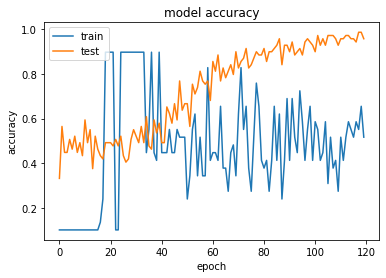

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
model.save("mmRoshani_covid_model.h5")

In [40]:
model.load_weights("mmRoshani_covid_model.h5")

In [44]:
pred_results = model.predict(([input_test,questions_test]))
pred_results.shape

(29, 121)

In [70]:
test_data[25][0]

['I',
 'am',
 'cold',
 'sweating',
 '.',
 'I',
 'am',
 'feeling',
 'sick,',
 'lost',
 'my',
 'sense',
 'of',
 'taste',
 'and',
 'smell',
 '.']

In [71]:
test_data[25][1]

['Do',
 'you',
 'think',
 'I',
 'have',
 'the',
 'Corona',
 'virus',
 'because',
 'I',
 'have',
 'cold',
 'sweating',
 'and',
 'feel',
 'sick',
 'and',
 'no',
 'taste',
 'and',
 'smell',
 '?']

In [72]:
test_data[1][2]

'yes'

In [59]:
pred_results[1]

array([3.1577383e-07, 3.4946311e-07, 4.0363904e-07, 2.9530105e-07,
       2.4754402e-07, 2.5569412e-07, 4.3662726e-07, 3.8779402e-07,
       5.2004935e-07, 8.2283327e-07, 3.4513062e-07, 5.2283661e-07,
       4.6830095e-07, 5.0230005e-07, 4.0676372e-07, 4.8863393e-07,
       4.0273505e-07, 6.1748261e-07, 2.5467781e-07, 5.9650347e-07,
       5.6332783e-07, 3.4161988e-07, 7.3538246e-07, 9.4837880e-01,
       5.2236868e-07, 2.3970742e-07, 5.5424948e-07, 4.5764082e-07,
       5.5561168e-07, 6.2510162e-07, 3.1074660e-07, 6.1000190e-07,
       3.8668981e-07, 3.0884098e-07, 5.1569160e-02, 4.0562520e-07,
       3.9611555e-07, 4.2427021e-07, 4.2645019e-07, 4.4443379e-07,
       3.7484480e-07, 3.6931502e-07, 3.3865376e-07, 2.7029972e-07,
       5.3684619e-07, 4.5555507e-07, 5.8840135e-07, 2.3697960e-07,
       4.8901006e-07, 4.9858699e-07, 3.0430843e-07, 2.7081836e-07,
       2.9937237e-07, 4.4230444e-07, 3.0163693e-07, 5.4240201e-07,
       4.5519329e-07, 9.0547150e-07, 6.1306253e-07, 4.7053166e

In [73]:
val_max = np.argmax(pred_results[25])

In [74]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
k

'yes'

How Sure i am?

In [85]:
pred_results[1][val_max]

0.05156916

Total words in vocan to make our own question

In [87]:
vocab

{'.',
 '?',
 'Can',
 'Corona',
 'Could',
 'Do',
 'Does',
 'I',
 'a',
 'ache',
 'aches',
 'all',
 'alot',
 'always',
 'am',
 'and',
 'any',
 'anyone',
 'anything',
 'are',
 'because',
 'bed',
 'bed.',
 'body',
 'breath',
 'breathe',
 'breathe,',
 'breathing',
 'but',
 "can't",
 'cannot',
 'caugh',
 'cause',
 'chills',
 'chills.',
 'cold',
 'corona',
 'coronavirus',
 'cough',
 'coughing',
 'difficulty',
 'dizzy',
 'dizzy.',
 'do',
 "don't",
 'dry',
 'except',
 'experiencing',
 'feel',
 'feeling',
 'fever',
 'feverish',
 'finding',
 'fine,',
 'food',
 'from',
 'get',
 'getting',
 'hard',
 'has',
 'have',
 'having',
 'high',
 'hurts',
 'iam',
 'if',
 'in',
 'infected',
 'is',
 'it',
 'linked',
 'lost',
 'lot',
 'me',
 'mean',
 'my',
 'no',
 'not',
 'of',
 'one',
 'out',
 'over',
 'phlegm.',
 'problem',
 'sense',
 'shortness',
 'sick',
 'sick,',
 'signs',
 'slight',
 'smell',
 'sneesing',
 'sneez',
 'sneezing',
 'sneezing,',
 'some',
 'stop',
 'suffering',
 'sweating',
 'symptom',
 'symptom

In [154]:
#our_story = "my symptoms are high fever and sneezing ."
our_story = "I have difficulty to breathe and fever and aches . I am dizzy ."
#our_story = "I am dizzy ."

#our_question = "Do you think I have the Corona virus because I have high fever and sneez ?"
our_question = "Do you think I have the Corona virus ?"
#our_question = "I am finding that i am dizzy is it Corona virus ?"
our_question.split()

['Do', 'you', 'think', 'I', 'have', 'the', 'Corona', 'virus', '?']

In [155]:
our_data = [(our_story.split(),our_question.split(),"yes")]

In [156]:
our_story, our_ques, our_ans = vectorize_stories(our_data)

In [157]:
pred_results = model.predict(([our_story,our_ques]))

In [158]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print(k)
pred_results[0][val_max]

yes


0.89037097

[(['I', 'cannot', 'taste', 'anything', '.'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', "can't", 'breathe', '.'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', "can't", 'get', 'out', 'of', 'bed', '.'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'no'),
 (['I', "can't", 'smell', 'anything'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', "can't", 'smell', 'things'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', "can't", 'stop', 'coughing'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', "can't", 'taste', 'anything'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', 'cough', 'up', 'phlegm.'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', "don't", 'feel', 'any', 'taste', 'in', 'the', 'food'],
  ['Do', 'I', 'have', 'corona', 'virus', '?'],
  'yes'),
 (['I', 'feel', 'dizzy.'], ['Do', 'I', 'have', 'corona', 'virus', '?'], 'no'),
 (['I', 'feel', 'fine,', 'exc